In [2]:
# Common Imports

#Pandas for creating dataframes
import pandas as pd

In [6]:
tdf = pd.read_csv('converted/s1', index_col=0)
#Filter Columns
t = tdf[['ip.dst', 'ip.proto', 'sniff_timestamp', 'sample']]
#Remove null destinations
t = t[t['ip.dst'].notnull()]
#Rename Columns
t.columns = ['ip', 'proto', 'time_stamp', 'sample']
#Get count for each ip
df = t.groupby(['ip', 'proto']).size().unstack().fillna(0).astype(int)

In [12]:
X = df.values

In [14]:
#Preprocessing the data (Feature Scaling)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
#Check the scaleing mean
print(scaler.mean_)
#Check the scale
print(scaler.scale_)
#Transform Traning data
X_trans = scaler.transform(X)

[  0.25    1.35   70.975  21.85 ]
[   1.1779219     5.98978297  271.18522153   65.63708936]


C:\Users\Tuli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
X_trans.shape

(40, 4)

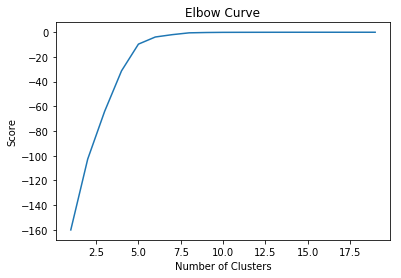

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_trans).score(X_trans) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [56]:
#Define Number of Clusters
cluster_count = 6

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=cluster_count)
kmeans.fit(X_trans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 2
 5 0 0]
[[ -2.12238180e-01  -2.25383792e-01  -2.25280149e-01  -1.57237140e-01]
 [ -2.12238180e-01  -2.25383792e-01   4.21492364e+00   6.05069487e+00]
 [  5.73043086e+00  -2.25383792e-01  -2.61721489e-01  -1.04361727e-01]
 [ -2.12238180e-01   4.28229205e+00  -2.61721489e-01  -1.34832304e-01]
 [ -2.12238180e-01  -2.25383792e-01   4.49148738e+00  -3.32891056e-01]
 [  2.33461998e+00  -2.25383792e-01  -2.61721489e-01   2.28529329e-03]]


In [81]:
ip_series = pd.Series(df.index, name='ip')

In [82]:
label_series = pd.Series(kmeans.labels_, name='label')

In [86]:
ip_label_df = pd.concat([ip_series, label_series], axis=1).set_index('ip')

In [ ]:
ip_label_df.csv('converted/ip_label')

In [70]:
X_pred = kmeans.predict([X[0]])

In [71]:
X_pred

array([4])

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(X)
pca_d = pca.transform(X)
#pca_c = pca.transform(X)

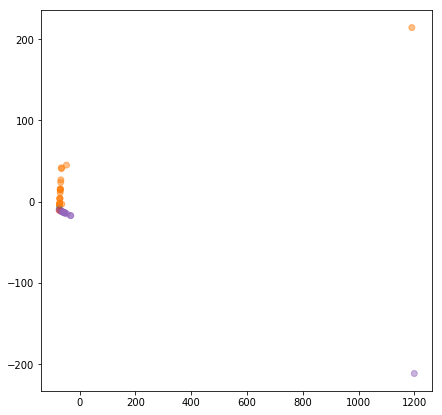

In [64]:
from matplotlib import colors
#Get colors
#color_list = list(colors.cnames.keys())
color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
# Define our own color map
LABEL_COLOR_MAP = {idx:val for idx, val in enumerate(color_list[:cluster_count])}
label_color = [LABEL_COLOR_MAP[l] for l in X_pred]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(pca_d[:,0],pca_d[:,1], c= label_color, alpha=0.5) 
plt.show()